<a href="https://colab.research.google.com/github/Legacy560/MLTSA25_RWolynetz/blob/main/HW7/autoencoder_time_series_instructions_MLTSA25_RWolynetz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder for time series
an autoencoder is a deep neural network that reproduces input data

it does so by progressively shrinking the size of the layers from the input size to a bottle neck and then expanding them back progressively to the initial size

note: the input and target are the same!

put your imports in the top cell

In [1]:
!pip install PyGithub
!pip install pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 10.2 MB/s eta 0:00:00


In [99]:
import pandas as pd
import numpy as np
import glob
import pylab as pl
from PIL import Image
from github import Github
import sys
import os
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [103]:
#Deep leaarning imports
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint


get the data by cloaning the repo https://github.com/nlandolfi/acc2022treelinearcascades_stocks.git

In [3]:

from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
cd gdrive/My\ Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework\ 7

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework 7


In [61]:
mkdir data

In [5]:
cd data

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework 7/data


In [10]:
cd data

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework 7/data/data


In [6]:
# First create a Github instance:
# we do not need to use username and password because we will access a public repo
g = Github()
guser = g.get_user("nlandolfi") #Get the user
repo = guser.get_repo("acc2022treelinearcascades_stocks") #Get the repo

In [7]:
#These are stock price time series. Use the " Volume" column as your chosen time series
stockPrices = repo.get_contents("data")
stockPrices

[ContentFile(path="data/aapl.csv"),
 ContentFile(path="data/amgn.csv"),
 ContentFile(path="data/axp.csv"),
 ContentFile(path="data/ba.csv"),
 ContentFile(path="data/cat.csv"),
 ContentFile(path="data/crm.csv"),
 ContentFile(path="data/csco.csv"),
 ContentFile(path="data/cvx.csv"),
 ContentFile(path="data/dis.csv"),
 ContentFile(path="data/dow.csv"),
 ContentFile(path="data/gs.csv"),
 ContentFile(path="data/hd.csv"),
 ContentFile(path="data/hon.csv"),
 ContentFile(path="data/ibm.csv"),
 ContentFile(path="data/intc.csv"),
 ContentFile(path="data/jnj.csv"),
 ContentFile(path="data/jpm.csv"),
 ContentFile(path="data/ko.csv"),
 ContentFile(path="data/mcd.csv"),
 ContentFile(path="data/mmm.csv"),
 ContentFile(path="data/mrk.csv"),
 ContentFile(path="data/msft.csv"),
 ContentFile(path="data/nke.csv"),
 ContentFile(path="data/pg.csv"),
 ContentFile(path="data/trv.csv"),
 ContentFile(path="data/unh.csv"),
 ContentFile(path="data/v.csv"),
 ContentFile(path="data/vz.csv"),
 ContentFile(path="data

In [65]:
# prompt: Get the Stock Prices datasets into my data folder

import os

# Create the data directory if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")

# Download each file from the repository
for file in stockPrices:
    file_path = os.path.join("data", file.name)
    if not os.path.exists(file_path):
        file_content = repo.get_contents(file.path).decoded_content
        with open(file_path, "wb") as f:
            f.write(file_content)


check that all files have the same length. The system command `wc -l returns` the  number of lines (stands for "word count -lines")

In [72]:
# prompt: check that all files have the same length using the system command wc -l to access the files in the current directory. do it in one line

!wc -l * | awk '{print $1}' | sort | uniq -d


2516


In [11]:
!wc -l * #They all have the same length, except dow

   2516 aapl.csv
   2516 amgn.csv
   2516 axp.csv
   2516 ba.csv
   2516 cat.csv
   2516 crm.csv
   2516 csco.csv
   2516 cvx.csv
   2516 dis.csv
    542 dow.csv
   2516 gs.csv
   2516 hd.csv
   2516 hon.csv
   2516 ibm.csv
   2516 intc.csv
   2516 jnj.csv
   2516 jpm.csv
   2516 ko.csv
   2516 mcd.csv
   2516 mmm.csv
   2516 mrk.csv
   2516 msft.csv
   2516 nke.csv
   2516 pg.csv
   2516 trv.csv
   2516 unh.csv
   2516 v.csv
   2516 vz.csv
   2516 wba.csv
   2516 wmt.csv
  73506 total


In [33]:
#create a list of all files you want to load
files = glob.glob("*") #Changed the path since we are in the current directory.
files

['aapl.csv',
 'amgn.csv',
 'axp.csv',
 'ba.csv',
 'cat.csv',
 'crm.csv',
 'csco.csv',
 'cvx.csv',
 'dis.csv',
 'dow.csv',
 'gs.csv',
 'hd.csv',
 'hon.csv',
 'ibm.csv',
 'intc.csv',
 'jnj.csv',
 'jpm.csv',
 'ko.csv',
 'mcd.csv',
 'mmm.csv',
 'mrk.csv',
 'msft.csv',
 'nke.csv',
 'pg.csv',
 'trv.csv',
 'unh.csv',
 'v.csv',
 'vz.csv',
 'wba.csv',
 'wmt.csv']

In [86]:
pd.read_csv(files[9]).shape[0]

542

In [13]:
numLines = len(open(files[0]).readlines()) #Changed the path since we are in the current directory.
numLines

2517

In [80]:
#create a numpy array to host the data
data = np.zeros((numLines-1,len(files))) # Corrected: Pass shape as a tuple # do not use hard coded numbers, use values calculated on the spot from the variables you have: the number of and shape of the files
data.shape

(2516, 30)

 read in all the data into the array

In [28]:
df = pd.read_csv(files[0])
df.head()
df.columns #There is whitespace before each column name.
df.shape[0]

2516

In [21]:
pd.read_csv(files[0]).loc[:, " Volume"]

,Volume
0,1.121723e+08
1,1.261428e+08
2,8.807123e+07
3,7.897327e+07
4,7.812833e+07
...,...
2511,2.611652e+08
2512,3.347730e+08
2513,4.527866e+08
2514,4.501414e+08


In [87]:
#remove
for i,f in tqdm(enumerate(files)):
  df = pd.read_csv(f)
  # Get the " Volume" column data
  volume_data = df.loc[:, " Volume"].values

    # Get the number of rows to fill with data
  data_len = df.shape[0]

    # Assign the data to the appropriate slice of the 'data' array
  data[0:data_len, i] = volume_data[:data_len]

    # Fill the remaining rows with zeros if the dataframe is shorter
  if data_len < data.shape[0]:
      data[data_len + 1:, i] = 0

30it [00:00, 65.52it/s]


In [88]:
volData = pd.DataFrame(data) #Check our work.
volData.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,112172305.0,2432107.0,3487353.0,14931190.0,3668456.0,5482463.0,22123311.0,11661880.0,8988117.0,4886215.0,...,12766850.0,36684367.0,5865117.0,8853733.0,1343273.0,2888410.0,7721250.0,14718590.0,5481645.0,8666144.0
1,126142797.0,2307165.0,3900087.0,16273170.0,3163104.0,6097853.0,20220910.0,12754780.0,10865550.0,5693429.0,...,11591970.0,33641594.0,8045369.0,10973730.0,1180231.0,3024021.0,7633289.0,17971891.0,5204153.0,8821379.0
2,88071234.0,4079879.0,2987640.0,14813940.0,3752901.0,5263698.0,23845561.0,13586540.0,8260306.0,5038957.0,...,10438730.0,29299891.0,5669327.0,8852710.0,1214508.0,2489255.0,9627426.0,22563000.0,6248220.0,8769245.0
3,78973273.0,2513035.0,2617982.0,12822990.0,3327927.0,5774748.0,24146010.0,10273020.0,6888401.0,5174923.0,...,11677010.0,27032910.0,10566670.0,6299182.0,1057297.0,1851063.0,4529048.0,15678650.0,4119741.0,7802805.0
4,78128328.0,2790864.0,2798825.0,11857110.0,4526952.0,5200021.0,27106820.0,9654939.0,6944863.0,4670553.0,...,12282050.0,26491090.0,5200987.0,9771262.0,1007611.0,3058890.0,6124286.0,14593090.0,3966202.0,5433952.0


In [89]:
#Set the column names
tickers = ["mmm", "axp", "amgn", "aapl", "ba", "cat", "cvx", "csco", "ko", "gs",
           "hd", "hon", "ibm", "intc", "jnj", "jpm", "mcd", "mrk", "msft", "nke",
           "pg", "crm", "trv", "unh", "vz", "v", "wba", "wmt", "dis", "dow"]
tickers.sort()

volData.columns = tickers
volData.head()

,aapl,amgn,axp,ba,cat,crm,csco,cvx,dis,dow,...,mrk,msft,nke,pg,trv,unh,v,vz,wba,wmt
0,112172305.0,2432107.0,3487353.0,14931190.0,3668456.0,5482463.0,22123311.0,11661880.0,8988117.0,4886215.0,...,12766850.0,36684367.0,5865117.0,8853733.0,1343273.0,2888410.0,7721250.0,14718590.0,5481645.0,8666144.0
1,126142797.0,2307165.0,3900087.0,16273170.0,3163104.0,6097853.0,20220910.0,12754780.0,10865550.0,5693429.0,...,11591970.0,33641594.0,8045369.0,10973730.0,1180231.0,3024021.0,7633289.0,17971891.0,5204153.0,8821379.0
2,88071234.0,4079879.0,2987640.0,14813940.0,3752901.0,5263698.0,23845561.0,13586540.0,8260306.0,5038957.0,...,10438730.0,29299891.0,5669327.0,8852710.0,1214508.0,2489255.0,9627426.0,22563000.0,6248220.0,8769245.0
3,78973273.0,2513035.0,2617982.0,12822990.0,3327927.0,5774748.0,24146010.0,10273020.0,6888401.0,5174923.0,...,11677010.0,27032910.0,10566670.0,6299182.0,1057297.0,1851063.0,4529048.0,15678650.0,4119741.0,7802805.0
4,78128328.0,2790864.0,2798825.0,11857110.0,4526952.0,5200021.0,27106820.0,9654939.0,6944863.0,4670553.0,...,12282050.0,26491090.0,5200987.0,9771262.0,1007611.0,3058890.0,6124286.0,14593090.0,3966202.0,5433952.0


plot the time series

<ipython-input-90-2586f810bcfe>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gist_ncar', volData.shape[1])


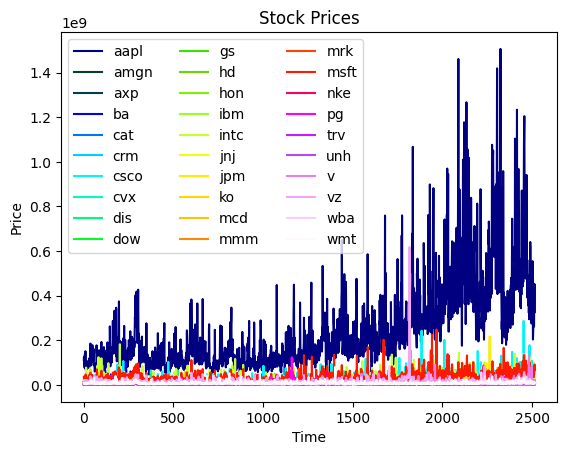

In [90]:
#Get a colormap
cmap = cm.get_cmap('gist_ncar', volData.shape[1])

for i in range(volData.shape[1]):
  plt.plot(volData.iloc[:,i], color = cmap(i))
  plt.title("Stock Prices")
  plt.xlabel("Time")
  plt.ylabel("Price")
  plt.legend(tickers, loc = "upper left", ncol = 3)



Figure 1: Here is a plot featuring all of our time series. It is impossible to make accurate sense of this plot with the data scaled in this manner. Some adjustments are needed.

scale the time series appropriately
hint: use Standard Scaler to save the mean and standard deviation of each time series, that way you can apply them later to your predicted results

In [175]:
#Get rid of the dow column
volData = volData.drop("dow", axis = 1)
volData.head()

,aapl,amgn,axp,ba,cat,crm,csco,cvx,dis,gs,...,mrk,msft,nke,pg,trv,unh,v,vz,wba,wmt
0,112172305.0,2432107.0,3487353.0,14931190.0,3668456.0,5482463.0,22123311.0,11661880.0,8988117.0,3309798.0,...,12766850.0,36684367.0,5865117.0,8853733.0,1343273.0,2888410.0,7721250.0,14718590.0,5481645.0,8666144.0
1,126142797.0,2307165.0,3900087.0,16273170.0,3163104.0,6097853.0,20220910.0,12754780.0,10865550.0,3734339.0,...,11591970.0,33641594.0,8045369.0,10973730.0,1180231.0,3024021.0,7633289.0,17971891.0,5204153.0,8821379.0
2,88071234.0,4079879.0,2987640.0,14813940.0,3752901.0,5263698.0,23845561.0,13586540.0,8260306.0,3396306.0,...,10438730.0,29299891.0,5669327.0,8852710.0,1214508.0,2489255.0,9627426.0,22563000.0,6248220.0,8769245.0
3,78973273.0,2513035.0,2617982.0,12822990.0,3327927.0,5774748.0,24146010.0,10273020.0,6888401.0,3378112.0,...,11677010.0,27032910.0,10566670.0,6299182.0,1057297.0,1851063.0,4529048.0,15678650.0,4119741.0,7802805.0
4,78128328.0,2790864.0,2798825.0,11857110.0,4526952.0,5200021.0,27106820.0,9654939.0,6944863.0,3048665.0,...,12282050.0,26491090.0,5200987.0,9771262.0,1007611.0,3058890.0,6124286.0,14593090.0,3966202.0,5433952.0


In [176]:
volData2 = volData.T #Trying something out. I think I made the data frame incorrectly to begin with.
volData2.head()

,0,1,2,3,4,5,6,7,8,9,...,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515
aapl,112172305.0,126142797.0,88071234.0,78973273.0,78128328.0,84000898.0,137564703.0,75135102.0,109839508.0,151100984.0,...,2.226950e+08,2.942217e+08,3.220826e+08,3.825088e+08,3.381907e+08,2.611652e+08,3.347730e+08,4.527866e+08,4.501414e+08,3.261919e+08
amgn,2432107.0,2307165.0,4079879.0,2513035.0,2790864.0,2765160.0,3556137.0,3587668.0,3420870.0,4053469.0,...,3.771199e+06,3.929055e+06,4.162559e+06,4.249797e+06,5.276661e+06,3.361946e+06,5.184489e+06,1.179495e+07,1.004510e+07,9.402696e+06
axp,3487353.0,3900087.0,2987640.0,2617982.0,2798825.0,3001638.0,3025258.0,2726404.0,2712846.0,2636183.0,...,6.092814e+06,5.735207e+06,8.052541e+06,6.479313e+06,7.404184e+06,6.947862e+06,7.241295e+06,7.721508e+06,7.250763e+06,8.198068e+06
ba,14931190.0,16273170.0,14813940.0,12822990.0,11857110.0,14913467.0,17807211.0,9887848.0,10380440.0,12296080.0,...,4.378219e+06,4.134831e+06,3.784298e+06,3.589447e+06,4.002819e+06,3.346199e+06,3.637977e+06,5.202027e+06,3.801072e+06,3.809897e+06
cat,3668456.0,3163104.0,3752901.0,3327927.0,4526952.0,3690578.0,4040671.0,3182883.0,3953489.0,5442416.0,...,6.643145e+06,6.193580e+06,7.277428e+06,1.009957e+07,8.657500e+06,8.618525e+06,9.472870e+06,1.923316e+07,8.292202e+06,9.253089e+06


In [177]:

scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaled_data1 = scaler.fit_transform(volData)
scaled_data2 = scaler.fit_transform(volData2)
print(scaler.mean_)


[13167674.96551724 14060723.62068965 12608836.68965517 ...
 34233443.25966127 32779916.74634203 26929574.37840517]


In [178]:
display(scaled_data1.mean(axis=0))
display(scaled_data2.mean(axis=0))

array([-8.11927808e-17, -1.40675318e-16, -7.37795269e-17, -6.17793222e-16,
        6.54484416e-16,  1.76693583e-16,  4.60151260e-16, -1.26819594e-16,
       -5.30621299e-17, -3.49481970e-16,  1.21303780e-16, -1.71652129e-17,
        5.95376954e-17,  8.87031130e-16, -9.35923305e-17, -7.30382015e-16,
        1.41006267e-16,  4.82071104e-16,  2.75360462e-16,  1.46464165e-16,
        7.58975995e-18, -1.22142183e-16,  1.21436159e-16,  6.52366343e-16,
        2.69524731e-16, -3.90784384e-16,  4.83185299e-17, -1.01099353e-16,
       -2.98350375e-17])

array([ 4.30689966e-17,  1.24421546e-17,  3.54122861e-17, ...,
        3.15839309e-17, -9.57088814e-19,  1.53134210e-17])

In [160]:
display(scaled_data1.std(axis=0))
display(scaled_data2.std(axis=0))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

array([1., 1., 1., ..., 1., 1., 1.])

split traiing and testimg data

In [226]:
X = scaled_data2
y = scaled_data2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [227]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23, 2516), (6, 2516), (23, 2516), (6, 2516))

build the model. It shoudl be a MLP (Multi Layer Perceptron) thus the only kind of layers you need are Dense layers (`from keras.layers import Dense`). Keep in mind the size of the initial time series. By definition a autoencoder will start with large layers, shdink the number of neurons in each layer progressively till a "bottle neck" layer (e.g. 32 neurons, but try what works). then add progressively larger layers until the last layer has the same size as the imput data. Use `relu` activation functions for all layers but the last one, which shoudl be `linear`

In [229]:
input_size = scaled_data2.shape[1]
model = Sequential()
#input layer
model.add(Dense(512, activation='relu', input_shape=(input_size,)))
#compression layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
#decompression layer
model.add(Dense(512, activation='relu'))
#output layer
model.add(Dense(input_size, activation='linear'))

In [230]:
# this is a call back that ensures you stop training when the validation loss stops improving (es)
# ad saves the model if it is better than the model at the previous training epoch (mc)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


write the `model.compile` command passing to the compile function the `adam` optimizer and `mean_squared_error` loss function

```model.compile(...```


In [231]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [232]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)               │ (None, 512)            │     1,288,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 2516)           │     1,290,708 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,731,892 (10.42 MB)

 Trainable params: 2,731,892 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

write the model.fit command. This will start the training of the neural network.
pass to the fit() function the following arguments:
- the imput data: that is your data train pd.array
- the desired output.... pay attention! this is an autoencoder so it should reproduce with fidelity the input data!
- create an internal validation set: this will split the training data so that at each epoch you can assess the model performance on unseen data `validation_split=0.1`
- set up training for 200 epochs with the `epoch=200` argument
- set the `batch_size`. I set it to 10, you can try different things. Larger batch makes a faster code the has higher risk of overfitting
- set `verbose=1`
- add the callbacks with `callbacks=[es, mc]


```training = model.fit(.....```



In [233]:
#remove
training = model.fit(X_train, y_train,
                     epochs=200,
                     batch_size=10,
                     validation_split=0.1,
                     verbose=1,
                     callbacks=[es, mc])

Epoch 1/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - loss: 0.1287
Epoch 1: val_loss improved from inf to 0.08027, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - loss: 0.9671 - val_loss: 0.0803
Epoch 2/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2.6947
Epoch 2: val_loss did not improve from 0.08027
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 1.8376 - val_loss: 0.0872
Epoch 3/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.1179
Epoch 3: val_loss did not improve from 0.08027
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.8946 - val_loss: 0.0866
Epoch 4/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.0343
Epoch 4: val_loss did not improve from 0.08027
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 1.3971 - val_loss: 0.0859
Epoch 5/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1138
Epoch 5: val_loss did not improve from 0.08027
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.3332 - val_loss: 0.0846
Epoch 6/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4107
Epoch 6: val_loss did not improve from 0.08027
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.3107 - val_loss: 0.0812
Ep

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 0.2473 - val_loss: 0.0782
Epoch 9/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.2207
Epoch 9: val_loss improved from 0.07815 to 0.07531, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - loss: 0.1808 - val_loss: 0.0753
Epoch 10/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 0.4120
Epoch 10: val_loss improved from 0.07531 to 0.06916, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - loss: 0.3114 - val_loss: 0.0692
Epoch 11/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0969
Epoch 11: val_loss improved from 0.06916 to 0.05619, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - loss: 0.1464 - val_loss: 0.0562
Epoch 12/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 0.0800
Epoch 12: val_loss improved from 0.05619 to 0.03874, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - loss: 0.1083 - val_loss: 0.0387
Epoch 13/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0413
Epoch 13: val_loss did not improve from 0.03874
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.0681 - val_loss: 0.0414
Epoch 14/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0910
Epoch 14: val_loss improved from 0.03874 to 0.03019, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - loss: 0.0763 - val_loss: 0.0302
Epoch 15/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0360
Epoch 15: val_loss did not improve from 0.03019
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0642 - val_loss: 0.0307
Epoch 16/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.0620
Epoch 16: val_loss improved from 0.03019 to 0.02952, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 0.0533 - val_loss: 0.0295
Epoch 17/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1955
Epoch 17: val_loss did not improve from 0.02952
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1368 - val_loss: 0.0296
Epoch 18/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.0363
Epoch 18: val_loss did not improve from 0.02952
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0437 - val_loss: 0.0314
Epoch 19/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0233
Epoch 19: val_loss improved from 0.02952 to 0.02951, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 0.0455 - val_loss: 0.0295
Epoch 20/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0520
Epoch 20: val_loss did not improve from 0.02951
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.0457 - val_loss: 0.0297
Epoch 21/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0323
Epoch 21: val_loss improved from 0.02951 to 0.02898, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.0703 - val_loss: 0.0290
Epoch 22/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0460
Epoch 22: val_loss did not improve from 0.02898
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0386 - val_loss: 0.0291
Epoch 23/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0319
Epoch 23: val_loss did not improve from 0.02898
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0490 - val_loss: 0.0291
Epoch 24/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.0365
Epoch 24: val_loss improved from 0.02898 to 0.02829, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 0.0434 - val_loss: 0.0283
Epoch 25/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0342
Epoch 25: val_loss improved from 0.02829 to 0.02794, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 0.0335 - val_loss: 0.0279
Epoch 26/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0933
Epoch 26: val_loss improved from 0.02794 to 0.02783, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 0.0701 - val_loss: 0.0278
Epoch 27/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.0610
Epoch 27: val_loss did not improve from 0.02783
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0461 - val_loss: 0.0280
Epoch 28/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0191
Epoch 28: val_loss did not improve from 0.02783
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0418 - val_loss: 0.0281
Epoch 29/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.0332
Epoch 29: val_loss improved from 0.02783 to 0.02779, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.0395 - val_loss: 0.0278
Epoch 30/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0458
Epoch 30: val_loss improved from 0.02779 to 0.02759, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 0.0370 - val_loss: 0.0276
Epoch 31/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0437
Epoch 31: val_loss improved from 0.02759 to 0.02759, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 0.0393 - val_loss: 0.0276
Epoch 32/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0251
Epoch 32: val_loss did not improve from 0.02759
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0286 - val_loss: 0.0277
Epoch 33/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0355
Epoch 33: val_loss did not improve from 0.02759
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0319 - val_loss: 0.0277
Epoch 34/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0344
Epoch 34: val_loss did not improve from 0.02759
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0334 - val_loss: 0.0276
Epoch 35/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0283
Epoch 35: val_loss improved from 0.02759 to 0.02750, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.0292 - val_loss: 0.0275
Epoch 36/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - loss: 0.0135
Epoch 36: val_loss improved from 0.02750 to 0.02749, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - loss: 0.0253 - val_loss: 0.0275
Epoch 37/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.0376
Epoch 37: val_loss did not improve from 0.02749
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0325 - val_loss: 0.0276
Epoch 38/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0401
Epoch 38: val_loss did not improve from 0.02749
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0329 - val_loss: 0.0276
Epoch 39/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0333
Epoch 39: val_loss did not improve from 0.02749
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0307 - val_loss: 0.0275
Epoch 40/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0194
Epoch 40: val_loss improved from 0.02749 to 0.02742, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 0.0255 - val_loss: 0.0274
Epoch 41/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.0403
Epoch 41: val_loss did not improve from 0.02742
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0330 - val_loss: 0.0274
Epoch 42/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0296
Epoch 42: val_loss did not improve from 0.02742
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0289 - val_loss: 0.0275
Epoch 43/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0333
Epoch 43: val_loss improved from 0.02742 to 0.02734, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 0.0317 - val_loss: 0.0273
Epoch 44/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - loss: 0.0201
Epoch 44: val_loss improved from 0.02734 to 0.02721, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - loss: 0.0257 - val_loss: 0.0272
Epoch 45/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0265
Epoch 45: val_loss did not improve from 0.02721
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0317 - val_loss: 0.0273
Epoch 46/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.0292
Epoch 46: val_loss did not improve from 0.02721
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0290 - val_loss: 0.0273
Epoch 47/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0410
Epoch 47: val_loss did not improve from 0.02721
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0358 - val_loss: 0.0272
Epoch 48/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0188
Epoch 48: val_loss improved from 0.02721 to 0.02712, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step - loss: 0.0270 - val_loss: 0.0271
Epoch 49/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0331
Epoch 49: val_loss improved from 0.02712 to 0.02703, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step - loss: 0.0307 - val_loss: 0.0270
Epoch 50/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0270
Epoch 50: val_loss improved from 0.02703 to 0.02700, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - loss: 0.0432 - val_loss: 0.0270
Epoch 51/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0316 
Epoch 51: val_loss did not improve from 0.02700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 0.0302 - val_loss: 0.0272
Epoch 52/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - loss: 0.0154
Epoch 52: val_loss did not improve from 0.02700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0696 - val_loss: 0.0272
Epoch 53/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1103
Epoch 53: val_loss improved from 0.02700 to 0.02686, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 0.0804 - val_loss: 0.0269
Epoch 54/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0654
Epoch 54: val_loss improved from 0.02686 to 0.02682, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 0.0612 - val_loss: 0.0268
Epoch 55/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.0245
Epoch 55: val_loss did not improve from 0.02682
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0562 - val_loss: 0.0269
Epoch 56/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0136
Epoch 56: val_loss did not improve from 0.02682
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0281 - val_loss: 0.0269
Epoch 57/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0208
Epoch 57: val_loss improved from 0.02682 to 0.02682, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 0.0489 - val_loss: 0.0268
Epoch 58/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0213
Epoch 58: val_loss improved from 0.02682 to 0.02673, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 0.0246 - val_loss: 0.0267
Epoch 59/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0186
Epoch 59: val_loss improved from 0.02673 to 0.02647, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.0225 - val_loss: 0.0265
Epoch 60/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0268
Epoch 60: val_loss improved from 0.02647 to 0.02646, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 0.0542 - val_loss: 0.0265
Epoch 61/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0241
Epoch 61: val_loss did not improve from 0.02646
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0261 - val_loss: 0.0268
Epoch 62/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.0274
Epoch 62: val_loss did not improve from 0.02646
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0943 - val_loss: 0.0268
Epoch 63/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0212
Epoch 63: val_loss did not improve from 0.02646
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0597 - val_loss: 0.0265
Epoch 64/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0294
Epoch 64: val_loss improved from 0.02646 to 0.02637, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - loss: 0.0294 - val_loss: 0.0264
Epoch 65/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2790
Epoch 65: val_loss did not improve from 0.02637
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.1955 - val_loss: 0.0264
Epoch 66/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0344
Epoch 66: val_loss did not improve from 0.02637
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0281 - val_loss: 0.0267
Epoch 67/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 0.1113
Epoch 67: val_loss did not improve from 0.02637
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0785 - val_loss: 0.0268
Epoch 68/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 0.1156
Epoch 68: val_loss did not improve from 0.02637
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0812 - val_loss: 0.0267
Epoch 69/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0262
Epoch 69: val_loss did not improve from 0.02637
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0263 - val_loss:

In [234]:
training.history.keys() # this stores the value of the loss at each epoch so you can plot it

dict_keys(['loss', 'val_loss'])

In [ ]:
#plot the loss function!!

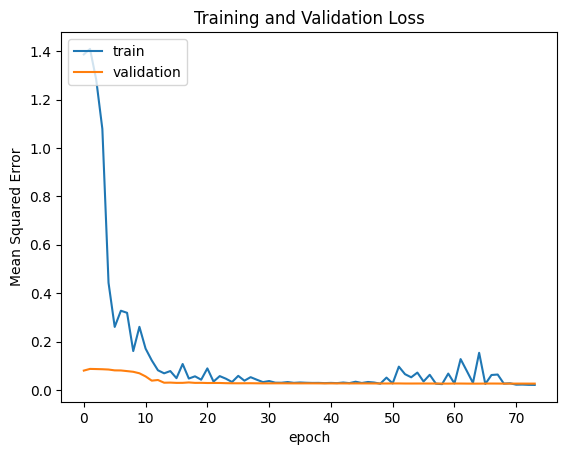

In [235]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss']);
plt.title('Training and Validation Loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left');
# add axis labels and legend!!

Figure 2: A plot of the training and validation loss functions of our autoencoder. Both the loss functions decay with the epochs, and seem to level off roughly around 0.15 MSE, indicating that the model is learning from the data.  The training function exhibits some degree of noise as shown by their jagged appearence toward the right of the plot. This could be an indication of the learing rate being too high or the batch size being too low. Additionally, the validation function begins with little error. This could be an issue with the size of the split between training and validation set, and should be investigated with further study

plot (visualize) the prediction and the ground truth for the test data. What do you see? where is the model succesful where is it not?

In [237]:
X_test.shape[0]

6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


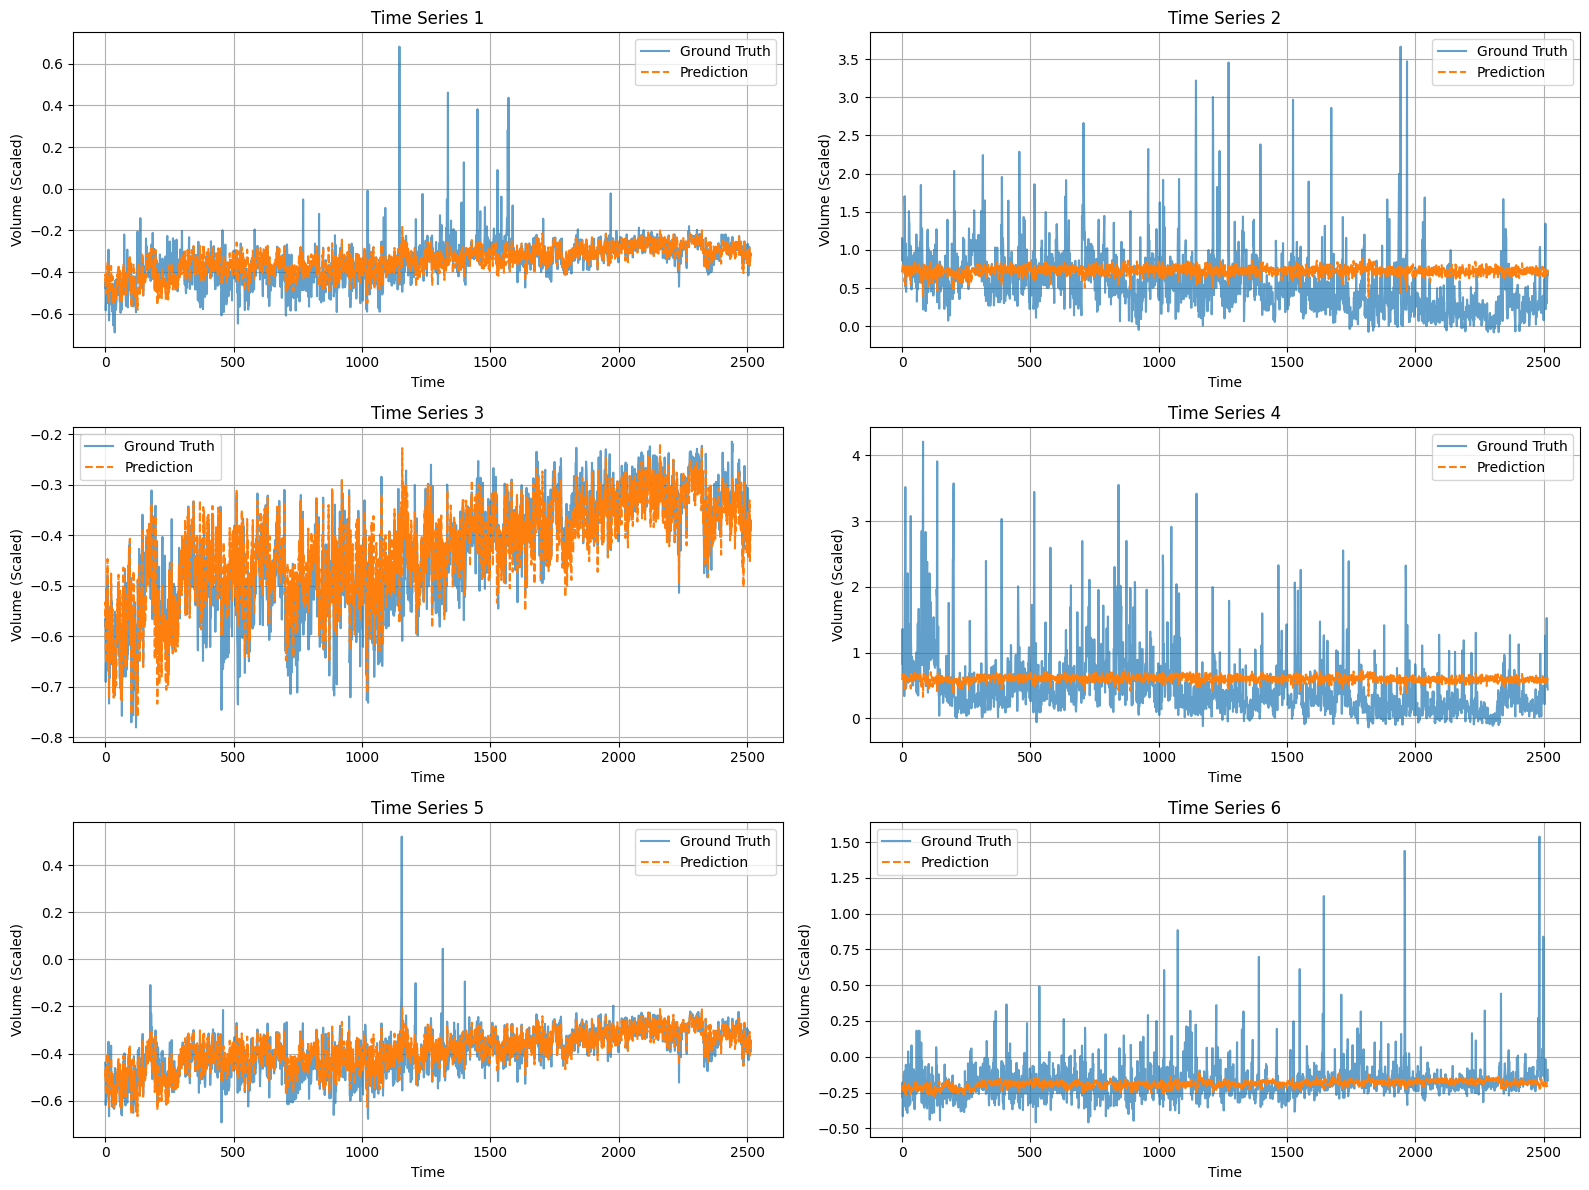

In [238]:
# prompt: plot (visualize) the prediction and the ground truth for the test data. Make a series of plots, one for each tome series

import matplotlib.pyplot as plt
# Load the best model
from keras.models import load_model
import math
model = load_model('best_model.h5')

# Predict on the test data
predictions = model.predict(X_test)
'''
# Inverse transform the scaled data to get the original scale
predictions = scaler1.inverse_transform(predictions)
y_test = scaler1.inverse_transform(y_test)
'''
cols = 2
rows = math.ceil(X_test.shape[0] / cols)
plt.figure(figsize=(16, 4 * rows))
# Plot the predictions and ground truth for each time series
for i in range(X_test.shape[0]):
    plt.subplot(rows, cols, i + 1)
    plt.plot(y_test[i], label='Ground Truth', alpha = 0.7)
    plt.plot(predictions[i], label='Prediction', linestyle = "dashed")
    plt.title(f'Time Series {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Volume (Scaled)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Figure 3: Plots of 6 prediction series alongside the true values. In some cases, the autoencoder fits the features of the series well. In other cases, it has some trouble fitting especially noisy data. The encoder may not be very sensitive to outliers.  